# **Welcome to `infer-subc`**
-----

## **<ins>Part 2</ins>: Quantification**

`Part 2` of infer-subc carries out quantification on segmented organelle objects. Four modular pipelines are included: 
1. [Organelle morphology]() (amount, size, shape)
2. [Organelle interactions]() (amounts, size, shape)
3. [Subcellular distribution]() in XY and Z separately (of organelles and interaction sites)
4. [Cell morphology]() (size, shape)

Together, these analyses make up the `*organelle signature*`, a descriptive summary of the organelles in a particular cell type under particular conditions. Because the organelle signature is quantitative, it can be used to compare between cell types and conditions. Example organelle signatures generated here include the lysosomes, mitochondria, golgi, peroxisomes, ER, and lipid droplets (LD), major membrane bound oragnelles involved in a variety of cellular activities. 

*Organelle segmentations can be created using infer-subc or through alternative methods that may be preferred or more well suited for a particular experimental setup.*

### **File Format**
#### ➡️ Part 2 input formatting:
The `infer-subc` quantification pipelines take in the following files:
1. **"Raw" image** - The intensity image used to generate the segmentations. *If you did not use infer-subc `Part 1` to create your segmentations, please see the [1.0_image_setup](https://github.com/SCohenLab/infer-subc/blob/49b0100ea8ab74fe03ad638702b0ceb41d636bd2/notebooks/part_1_segmentation_workflows/1.0_image_setup.ipynb) notebook for information about the file types accepted.*
2. **Organelle segmentation file(s)** - The unsigned integer (i.e., all pixels/voxels in an object are labeled with a unique object number) files associated to each of the organelles you'd like to quantify. 
    - ***Naming:*** The files should have the same route file name as the raw image. The only thing differentiating them should be the file suffix. You will be able to specify the character used to separate the route name from the suffix (e.g., "-" in the example below) and the masks/organelle names used as the suffix (e.g., "cell", "nuc", "lyso" in the example below).
    - ***File location:*** All organelle segmentation files that you would like to include in the same analysis should be saved in the same location. Our convention is to quantify all the image files from one experiment at the same time. The quantitative metrics for each experiment are subsequently combined and summarized per. See the file structure example below.
    - ***File type:*** The files can be saved as '.tif' or '.tiff' files. The default output from the Napari `organelle-segmenter-plugin` and [`batch_process_segmentation` notebook]() is '.tiff', but if any files are editted and saved directly from Napari using `File` > `Save Selected Layers...`, the default if '.tif'. *Other file types are currently not supported!*
3. **Mask file(s)** - At least one binary mask file is required. The mask will be used to determine the area from which to quantify the organelles. For single cell analysis, this would typically be the "cell mask". This is especially important to measure subcellular distribution and metrics such as the organelle volume fraction (organelle volume / cell volume). Additional masks, like the nucleus or other subcellular regions (e.g., neurites and some in neurons), can be included for morphological analysis, too. The naming, location, and file type follows the same conventions used for segmentation files.
4. **Information for each quantification method**: Each quantification method has a specific set of parameters that you can specify for your desired outcome. See the `'Method_...'` notebooks in this section for more details on these paratmeters.

> **Example file naming & folder architecture:**
> - 📂 experiment_1
>     - 📂 raw_data
>         - 📜 date_condition1_cell1.czi
>         - 📜 date_condition2_cell1.czi
>         - 📜 ...
>     - 📂 segmentation_data
>         - 📜 date_condition1_cell1-cell.tif
>         - 📜 date_condition1_cell1-nuc.tiff
>         - 📜 date_condition1_cell1-lyso.tiff
>         - 📜 date_condition1_cell1-mito.tiff
>         - 📜 date_condition1_cell1-golgi.tif
>         - 📜 date_condition1_cell1-perox.tiff
>         - 📜 date_condition1_cell1-ER.tiff
>         - 📜 date_condition1_cell1-LD.tiff
>         - 📜 date_condition2_cell1-cell.tiff
>         - 📜 date_condition2_cell1-nuc.tiff
>         - 📜 date_condition2_cell1-lyso.tiff
>         - 📜 date_condition2_cell1-mito.tiff
>         - 📜 date_condition2_cell1-golgi.tiff
>         - 📜 date_condition2_cell1-perox.tiff
>         - 📜 date_condition2_cell1-ER.tiff
>         - 📜 date_condition2_cell1-LD.tiff
>         - 📜 ...
>     - 📂 quantification_output
> - 📂 experiment_2
>     - 📂 raw_data
>     - 📂 segmentation_data
>     - 📂 quantification_output
> 
> ***Experiment Folder**: 'experiment_1' and 'experiment_2' do not have to be in the same location. You will initially quantify each experiment's worth of data separately.*

#### Part 2 expected output: ➡️ 
A. **batch_process_quantification()** will result in the following files:
- `file-prefix_contacts.csv` - metrics derived from the [organelle interaction method]()
- `file-prefix_distributions.csv` - metrics derived from the [subcellular distribution method]()
- `file-prefix_organelles.csv` - metrics derived from the [organelle morphology method]()
- `file-prefix_regions.csv` - metrics derived from the [cell regions morphology method]()

B. **batch_process_summarystats()** will result in the following files:
- `file-prefix_distribution_summarystats.csv` - per cell summary statistics of the metrics included in the 'file-prefix_distributions.csv' file
- `file-prefix_per_contact_summary.csv` - per cell summary statistics of the metrics included in the 'file-prefix_contacts.csv' file
- `file-prefix_per_org_summary.csv` - per cell summary statistics of the metrics included in the 'file-prefix_organelles.csv file
- `file-prefix_per_region_summary.csv` - per cell summary statistics of the metrics included in the 'file-prefix_regions.csv'
- `file-prefix_summarystats_combined.csv` - combined metrics for all organelles and interaction sites summarized per cell. Each column includes the calculated values for a single metric; each row includes the values associated to a single cell. The definitions for each metric are included here: [batch_summary_stats_output_definitions.xlsx](batch_summary_stats_output_definitions.xlsx)

**'file-prefix' is user defined and can differ between experiments as needed.*
-----

## **Using Jupyter notebooks in `infer-subc`**

#### 📍 **Purpose of `Part 2: Quantification` Notebooks:**

The Part 2 Juptyer notebooks include expository examples of the quantification methods and batch processing functions as well as pipelines to carry out all of the quantification in combination. 

#### ✅ **Part 2: Segmentation Checklis:**
1. <input type="checkbox"/>  **Quantification Setup**
   
   Use [2.0_quantification_setup](2.0_quantification_setup.ipynb) (this notebook) to ensure your raw and segmentation files can be read into memory and metadata is accessible
2. <input type="checkbox"/>  **Batch process quantification for each experiment separately**

   Use the `batch_process_quantification()` function available in the [batch_process_quantification](batch_process_quantification.ipynb) to quantification the organelle morphology, interactions, and distribution and cell/cellular regions morphology for each experiment, *separately*
3. <input type="checkbox"/>  **Summarize metrics per cell across one or more experiments** 
   
   Use the `batch_summary_stats()` function available in the [batch_process_quantification](batch_process_quantification.ipynb) to summarize the output metrics from 'batch_process_quantification()' per cell. This function can be used to summarize data from a single experiment or can summarize the data across mulitple experiemnts. 

#### 📖 **How to use Jupyter Notebooks:**  
 
Advance through each block of code below by pressing `Shift`+`Enter` or pressing the "Execute Cell" (`▶️`) button to the left of each block.
 

You will see a series of instructions before each block of code. Be on the look out for the following headers and follow the instructions accordingly:
- &#x1F3C3; **Run code; no user input required** - proceed without adding anything to the code block
- &#x1F453; **FYI** (for your information) - helpful information usually to bring context to what is going on
- &#x1F6D1; &#x270D; **User Input Required** - stop and input the appropriate information about your data. The following indicator will also be present in the code block:
   ```python 
   #### USER INPUT REQUIRED ###
   ```

-----

----- 

# **2.0 Quantification Setup**

The first thing we need to be able to do is access the raw image and segmentation files and interact with them (e.g., read the metadata and visualize the image). The following notebook walks you through the steps used in all of the `part_2_quantification` notebooks to load your image of choice.

### 👣 **Summary of steps**  

**IMPORTS**

- **`Step 1`** - load all python packages necessary for this notebooks

**LOAD AND READ IN RAW IMAGE FOR PROCESSING**

- **`Step 2`** - Select image from file list
- **`Step 3`** - Load image into memory and print the associated metadata

**READ IN THE MATCHING SEGMENTATION FILES**

- **`Step 4`** - Load the segmentation files that match the raw image

**VIZUALIZE**

- **`Step 4`** - View the raw image and matching segmentation files using Napari

-----
## **IMPORTS**

#### &#x1F3C3; **Run code; no user input required**

&#x1F453; **FYI:** This code block loads all of the necessary python packages and functions you will need for this notebook. The convention with notebooks (and python in general) is to import the nescessary packages as the first thing. We are using `napari` for visualization. The underlying data format are `numpy` `ndarrays`. Quantitative data will be formated, summarize, and exported as '.csv' files using `pandas`.

In [24]:
from pathlib import Path
import os

import napari
from napari.utils.notebook_display import nbscreenshot
import pandas as pd
import numpy as np

from infer_subc.core.file_io import (read_czi_image,
                                     read_tiff_image,
                                     export_inferred_organelle,
                                     import_inferred_organelle,
                                     list_image_files)
from infer_subc.utils.batch import find_segmentation_tiff_files

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


-----
## **LOAD IMAGE AND READ RAW IMAGE METADATA**

#### &#x1F6D1; &#x270D; **User Input Required:**

Please specify the following information about your data:
- `raw_img_type`: the file type of your raw image written in quotation marks; EX: ".czi" or ".tiff"
- `data_root_path`: the path to folder that contains subfolders, including your input data and a separate folder for segmentation outputs to be saved; EX: "C:/Users/{your-user-name}/Documents/Exp1"
- `raw_data_path`: the path to the folder that contains your input data; EX: data_root_path / "input"
- `seg_data_path`: the path to the folder that contains your segmentation files; EX: data_root_path / "segmentations"
- `quant_data_path`: the path to the folder where quantification output files will be saved; EX: data_root_path / "quantification"


Follow this example's formatting:
> ```python 
> raw_img_type = ".czi"
> data_root_path = Path(os.path.expanduser("~")) / "Documents/Python_Scripts/Infer-subc"
> raw_data_path = data_root_path / "raw"
> seg_data_path = data_root_path / "out"
> quant_data_path = data_root_path / "quant"
> ```

#### 📝 **Sample Data:**
If you would like to run the notebooks with sample data

<mark> include information about accessing sample data here; maybe referring them to the .io cite where they can learn how to clone the repo locally and use the notesbooks and sample data directly without changing any path information listed below or in any of the other notebooks </mark>

<mark> need to EVENTUALLY mention in all other notebooks that the sample data is already set up for use if the repo if cloned locally </mark>

In [14]:
#### USER INPUT REQUIRED ###
raw_img_type = ".czi"
data_root_path = Path(os.path.expanduser("~")) / "Documents/Python_Scripts/Infer-subc"
raw_data_path = data_root_path / "raw_single"
seg_data_path = data_root_path / "out_single"
quant_data_path = data_root_path / "quant_single"

#### &#x1F3C3; **Run code; no user input required**
&#x1F453; **FYI:** 
- A list of the images included in the `raw_data_path` folder is printed below for easy reference.
- If the `quant_data_path` folder does not exist, it will be created now.

In [15]:
# Create the output directory to save the segmentation outputs in.
if not Path.exists(quant_data_path):
    Path.mkdir(quant_data_path)
    print(f"making {quant_data_path}")

# Create a list of the file paths for each image in the input folder. Select test image path.
raw_img_file_list = list_image_files(raw_data_path,raw_img_type)
pd.set_option('display.max_colwidth', None)
pd.DataFrame({"Image Name":raw_img_file_list})

,Image Name
0,C:\Users\Shannon\Documents\Python_Scripts\Infer-subc\raw_single\a24hrs_Ctrl_14_Unmixing.czi


#### &#x1F6D1; &#x270D; **User Input Required:**

Use the list above to specify which image you wish to analyze:
- `test_img_n`: the index, or number, associated with your image of choice from the list above.


Follow this example's formatting:
> ```python 
> test_img_n = 5
> ```

In [18]:
#### USER INPUT REQUIRED ###
test_img_n = 0

#### &#x1F3C3; **Run code; no user input required**

&#x1F453; **FYI:** This code block reads the image and image metadata into memory. Then, the metadata is printed.

In [19]:
# Read in the image and metadata as an ndarray and dictionary from the test image selected above. 
test_img_name = raw_img_file_list[test_img_n]
img_data,meta_dict = read_czi_image(test_img_name)

# Define some of the metadata features.
channel_names = meta_dict['name']
meta = meta_dict['metadata']['aicsimage']
scale = meta_dict['scale']
channel_axis = meta_dict['channel_axis']
file_path = meta_dict['file_name']

print("Metadata information")
print(f"File path: {file_path}")
for i in list(range(len(channel_names))):
    print(f"Channel {i} name: {channel_names[i]}")
print(f"Scale (ZYX): {scale}")
print(f"Channel axis: {channel_axis}")

Metadata information
File path: C:\Users\Shannon\Documents\Python_Scripts\Infer-subc\raw_single\a24hrs_Ctrl_14_Unmixing.czi
Channel 0 name: 0 :: a24hrs_Ctrl_14_Unmixing-0 :: Nuclei_Jan22
Channel 1 name: 0 :: a24hrs_Ctrl_14_Unmixing-0 :: Lyso+405_Jan22
Channel 2 name: 0 :: a24hrs_Ctrl_14_Unmixing-0 :: Mito+405_Jan22
Channel 3 name: 0 :: a24hrs_Ctrl_14_Unmixing-0 :: Golgi+405_Jan22
Channel 4 name: 0 :: a24hrs_Ctrl_14_Unmixing-0 :: Peroxy+405_Jan22
Channel 5 name: 0 :: a24hrs_Ctrl_14_Unmixing-0 :: ER+405_Jan22
Channel 6 name: 0 :: a24hrs_Ctrl_14_Unmixing-0 :: BODIPY+405low_Jan22
Channel 7 name: 0 :: a24hrs_Ctrl_14_Unmixing-0 :: Residuals
Scale (ZYX): (0.3891184878080979, 0.07987165184837317, 0.07987165184837318)
Channel axis: 0


-----
## **READ IN THE MATCHING SEGMENTATION FILES**

&#x1F453; **FYI:** This code block finds the segmentation files that match your selected raw image.

#### &#x1F6D1; &#x270D; **User Input Required:**

Specify the following information:
- `seg_file_names`: a list of image suffixes used for each of the segmentation files you would like to include in the analysis
- `suffix_separator`: the character used to separate the route file name (same as the raw file) and the organelle/mask suffix

Follow this example's formatting:
> ```python 
> seg_file_names = ["cell", "nuc", "lyso", "mito", "golgi", "perox", "ER", "LD"]
> suffix_separator = "-"
> ```

In [35]:
#### USER INPUT REQUIRED ###
org_file_names = ["lyso", "mito", "golgi", "perox", "ER", "LD"]
org_channels_ordered = [1, 2, 3, 4, 5, 6]
regions_file_names = ["cell", "nuc"]
suffix_separator = "-"

#### &#x1F3C3; **Run code; no user input required**

&#x1F453; **FYI:** This code finds the matching segmentation file from the `seg_file_path` folder.

In [36]:
# find file paths for segmentations
all_suffixes = org_file_names + regions_file_names
filez = find_segmentation_tiff_files(file_path, all_suffixes, seg_data_path, suffix_separator)

# read the segmentation and masks/regions files into memory
organelles = [read_tiff_image(filez[org]) for org in org_file_names]
regions = [] 
for m in regions_file_names:
    mfile = read_tiff_image(filez[m])
    regions.append(mfile)

# match the intensity channels to the segmentation files
intensities = [img_data[ch] for ch in org_channels_ordered]

# print paths to matching seg files
print("Matching files found:")
filez

Matching files found:


{'raw': WindowsPath('C:/Users/Shannon/Documents/Python_Scripts/Infer-subc/raw_single/a24hrs_Ctrl_14_Unmixing.czi'),
 'lyso': WindowsPath('C:/Users/Shannon/Documents/Python_Scripts/Infer-subc/out_single/a24hrs_Ctrl_14_Unmixing-lyso.tiff'),
 'mito': WindowsPath('C:/Users/Shannon/Documents/Python_Scripts/Infer-subc/out_single/a24hrs_Ctrl_14_Unmixing-mito.tiff'),
 'golgi': WindowsPath('C:/Users/Shannon/Documents/Python_Scripts/Infer-subc/out_single/a24hrs_Ctrl_14_Unmixing-golgi.tiff'),
 'perox': WindowsPath('C:/Users/Shannon/Documents/Python_Scripts/Infer-subc/out_single/a24hrs_Ctrl_14_Unmixing-perox.tiff'),
 'ER': WindowsPath('C:/Users/Shannon/Documents/Python_Scripts/Infer-subc/out_single/a24hrs_Ctrl_14_Unmixing-ER.tiff'),
 'LD': WindowsPath('C:/Users/Shannon/Documents/Python_Scripts/Infer-subc/out_single/a24hrs_Ctrl_14_Unmixing-LD.tiff'),
 'cell': WindowsPath('C:/Users/Shannon/Documents/Python_Scripts/Infer-subc/out_single/a24hrs_Ctrl_14_Unmixing-cell.tiff'),
 'nuc': WindowsPath('C:/Use

-----
## **VISUALIZE THE IMAGES**

#### &#x1F3C3; **Run code; no user input required**

&#x1F453; **FYI:** This code block opens your image in Napari. The Napari graphical user interface (GUI) will open as a separate window. You can learn more about how to use the Napari GUI [here](https://napari.org/stable/tutorials/fundamentals/quick_start.html).

*In the Napari viewer, the organelle segmentations are added as "labels" layers where each object appears as a different color.*

22-Nov-24 12:07:12 - vispy    - WARNING  - QWindowsWindow::setGeometry: Unable to set geometry 1086x656+387-315 (frame: 1104x703+378-353) on QWidgetWindow/"_QtMainWindowClassWindow" on "\\.\DISPLAY1". Resulting geometry: 1360x822+388-308 (frame: 1378x869+379-346) margins: 9, 38, 9, 9 minimum size: 385x515 MINMAXINFO maxSize=0,0 maxpos=0,0 mintrack=403,562 maxtrack=0,0)


Proceed to Napari window to view your selected image.


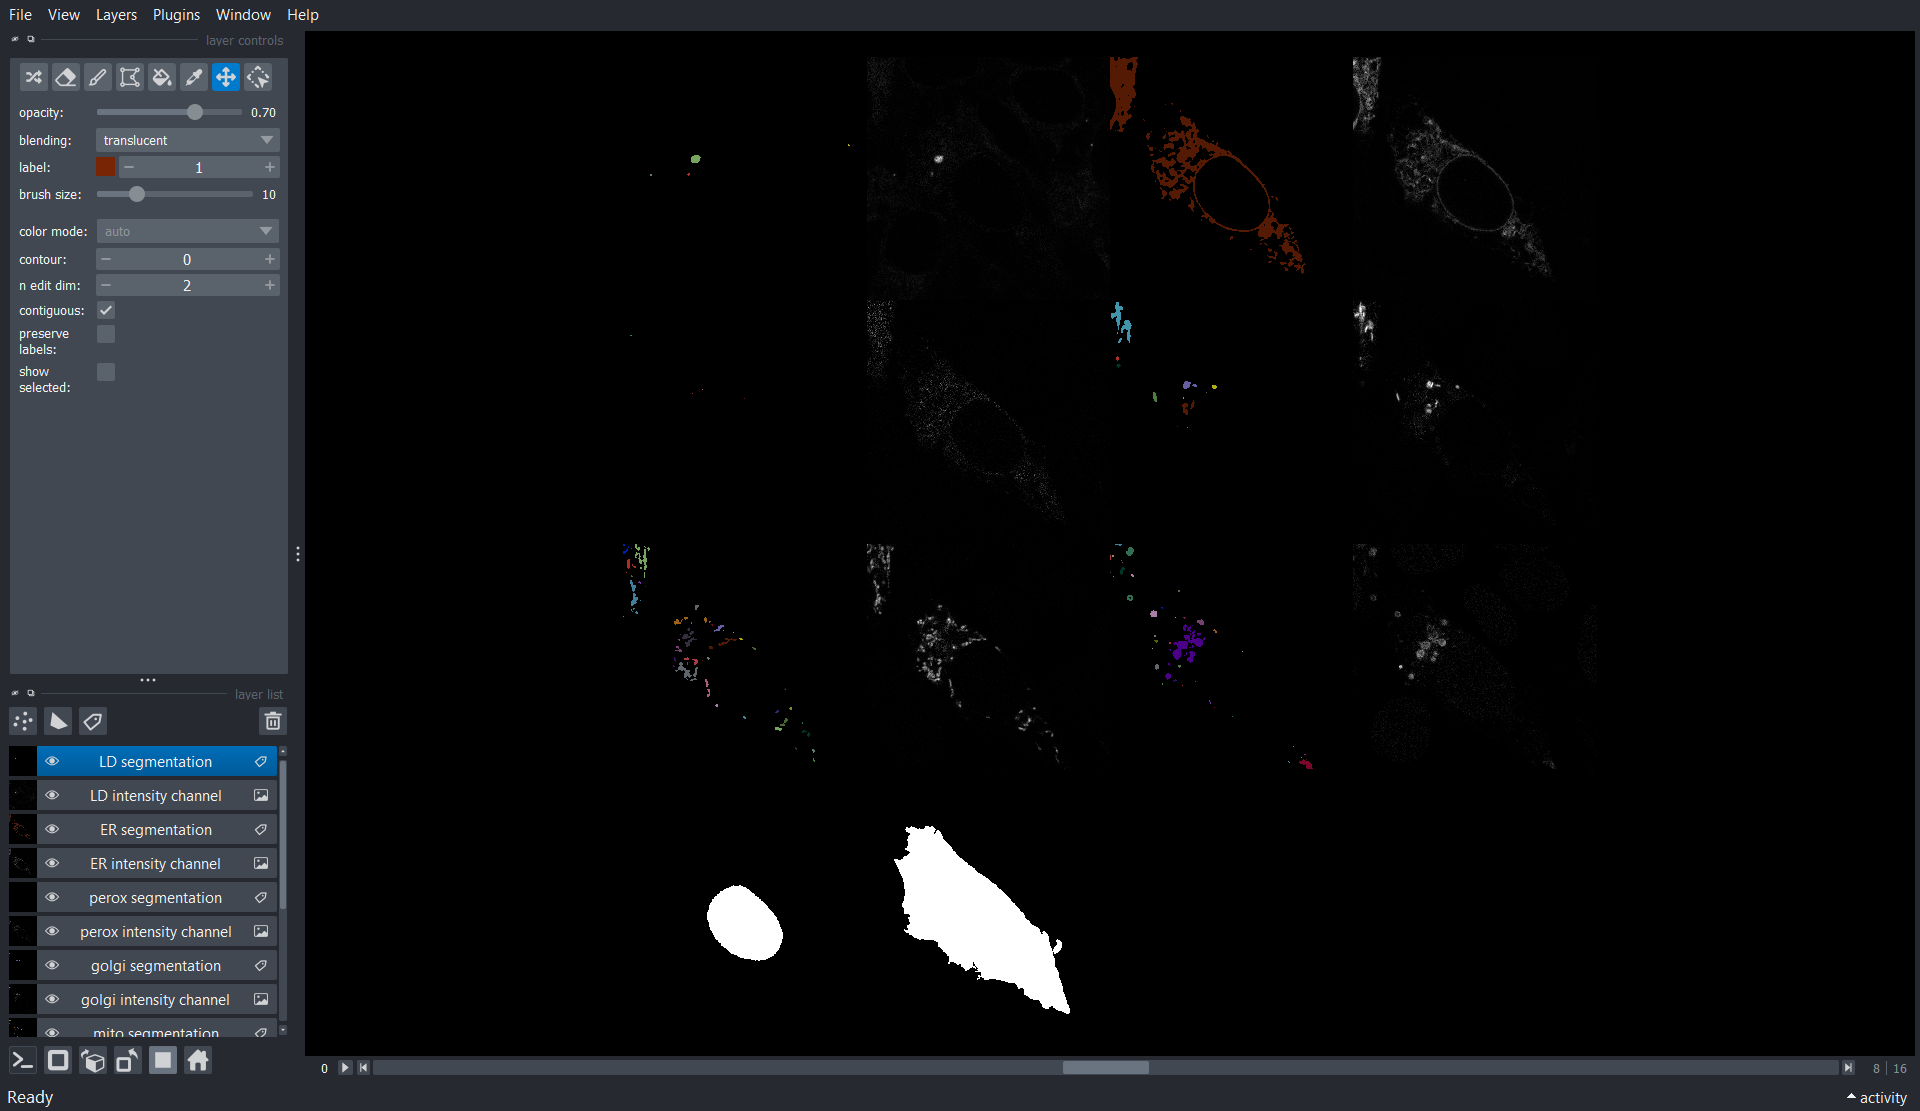

In [ ]:
# open viewer and add images
viewer = napari.Viewer()
for r, reg in enumerate(regions_file_names):
    viewer.add_image(regions[r],
                     scale=scale,
                     name=f"{reg} mask")

# colors = ["red", "bop orange", "yellow", "green", "blue", "cyan", "magenta", "bop purple"]
for o, org in enumerate(org_file_names):
    viewer.add_image(intensities[o],
                     scale=scale,
                     name=f"{org} intensity channel")
    viewer.add_labels(organelles[o],
                      scale=scale,
                      name=f"{org} segmentation")
viewer.grid.enabled = True
viewer.reset_view()
    
print("Proceed to Napari window to view your selected image.")

# screenshot viewer
nbscreenshot(viewer, canvas_only = False)

--------------
### **NEXT STEPS**

Now that your files are able to be accessed, you can continue on the the methods notebooks that illustrate how each quantification method is carried out:
- [**Organelle Morphology**]() - quantification of the morphology of each organelle; this notebook uses a single organelle type within a single cell as an example
- [**Organelle distribution**]() - quantification of the subcellular distribution of organelles in  XY and Z separately; this notebook uses a single organelle type within a single cell as an example
- [**Organelle Interactions**]() - creation of organelle interaction sites; quantification of their morphology and distribution; this notebook uses a single cell as an example
- [**Cell Region Morphology**]() - quantification of the morphology of cell regions / masks
- [**Combined Analysis and Batch Processing**]() - this notebook includes functions for processing all three quantification methods one a single cell and batch processing the combined quantification across multiple cells
- [**Create Summary Statistics per Cell**]() - this notebook includes a description of the summary statistics function used to summarize all of the data per cell across several experiments


If you understand the methods included in infer-subc and are ready to quantify your data, please proceed to [**batch_process_quantification**](batch_process_quantification.ipynb).
